<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [961]:
#Importation de la librairie Pandas
import pandas as pd
from scipy.stats import chi2_contingency
from scipy import stats
import numpy as np

In [963]:
#Importation de la librairie plotly express
import plotly.express as px

In [965]:
#import de matplotlib
import matplotlib.pyplot as plt

In [967]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe 
#Utilisation de Pandas
pd.set_option('display.max_columns', None)
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [970]:
#Importation du fichier web.xlsx
web = "C:/Users/elodi/Desktop/Projet6/Data+Bottleneck/web.xlsx"
df_web = pd.read_excel(web)
#Importation du fichier erp.xlsx
erp = "C:/Users/elodi/Desktop/Projet6/Data+Bottleneck/erp.xlsx"
df_erp = pd.read_excel(erp)
#importation du fichier liaison.xlsx
liaison = "C:/Users/elodi/Desktop/Projet6/Data+Bottleneck/liaison.xlsx"
df_liaison = pd.read_excel(liaison)

C:\Users\elodi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning:

Unknown extension is not supported and will be removed

C:\Users\elodi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning:

Unknown extension is not supported and will be removed

C:\Users\elodi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning:

Unknown extension is not supported and will be removed



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [974]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [976]:
#Consulter le nombre de colonnes
num_columns = df_erp.shape[1]
print(f'Nombre de colonnes : {num_columns}')
#La nature des données dans chacune des colonnes
df_erp.info()
#Le nombre de valeurs présentes dans chacune des colonnes
valeurs_presentes = df_erp.count()
print(valeurs_presentes)

Nombre de colonnes : 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [978]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [980]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
nombre_doublons = df_erp['product_id'].duplicated().sum()
print(f'Nombre de doublons dans product_id : {nombre_doublons}')


Nombre de doublons dans product_id : 0


In [982]:
#Afficher les valeurs distinctes de la colonne stock_status
valeurs_distinctes = df_erp['stock_status'].unique()
print("Valeurs distinctes dans 'stock_status' :")
print(valeurs_distinctes)
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
#mode opératoire
# Filtrer les colonnes non numériques
non_numeric_cols = df_erp.select_dtypes(exclude=['number']).columns
# Stocker les colonnes liées
related_columns = []
# Boucler sur les colonnes non numériques pour tester leur relation avec 'stock_status'
for col in non_numeric_cols:
    if col != 'stock_status':  # Ne pas comparer 'stock_status' avec lui-même
        # Créer une table de contingence
        contingency_table = pd.crosstab(df_erp['stock_status'], df_erp[col])
        
        # Appliquer le test du chi²
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Vérifier si la relation est significative (p < 0.05)
        if p < 0.05:
            related_columns.append(col)

# Afficher les colonnes liées
if related_columns:
    print(f"Les colonnes liées à 'stock_status' sont : {related_columns}")
else:
    print("Aucune colonne n'est liée à 'stock_status'.")

Valeurs distinctes dans 'stock_status' :
['instock' 'outofstock']
Aucune colonne n'est liée à 'stock_status'.


In [984]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
# Fonction pour assigner 'instock' ou 'outofstock' en fonction de 'stock_quantity'
def stock_status(row):
    if row['stock_quantity'] == 0:
        return 'outofstock'
    else:
        return 'instock'

# Appliquer cette fonction sur le DataFrame pour créer 'stock_status_2'
#df_erp['stock_status_2'] = df_erp.apply(stock_status, axis=1)
df_erp["stock_status_2"] = df_erp["stock_quantity"].apply(lambda x: "instock" if x > 0 else "outofstock" )
# Afficher les premières lignes pour vérifier
print(df_erp[['stock_quantity', 'stock_status_2']].head())

   stock_quantity stock_status_2
0              16        instock
1              10        instock
2               0     outofstock
3              26        instock
4               3        instock


In [986]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [988]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
# Comparer les colonnes 'stock_status' et 'stock_status_2', puis calculer la somme des valeurs True (1)
comparaison = (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()

# Afficher le résultat
print(f"Nombre de lignes où 'stock_status' est égal à 'stock_status_2' : {comparaison}")

# Vérifier si toutes les lignes sont égales
if comparaison == len(df_erp):
    print(f"Les colonnes sont égales sur toutes les {len(df_erp)} lignes.")
else:
    print(f"Il y a {len(df_erp) - comparaison} lignes où 'stock_status' et 'stock_status_2' diffèrent.")

Nombre de lignes où 'stock_status' est égal à 'stock_status_2' : 823
Il y a 2 lignes où 'stock_status' et 'stock_status_2' diffèrent.


In [990]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

In [992]:
df_erp[(df_erp["stock_status"] != df_erp["stock_status_2"])]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [994]:
df_erp[df_erp["stock_quantity"] < 0 ]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


In [995]:
#Corriger la ou les données incohérentes
df_erp['stock_status'] = np.where(df_erp['stock_quantity'] == 0, 'outofstock', df_erp['stock_status'])
df_erp['stock_status'] = np.where(df_erp['stock_quantity'] > 0, 'instock', df_erp['stock_status'])
df_erp[(df_erp["stock_status"] != df_erp["stock_status_2"])]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


In [998]:
#Verification en utilisant le même code que plus haut pour afficher les problemes
if comparaison == len(df_erp):
    print(f"Les colonnes sont égales sur toutes les {len(df_erp)} lignes.")
else:
    print(f"Il y a {len(df_erp) - comparaison} lignes où 'stock_status' et 'stock_status_2' diffèrent.")

Il y a 2 lignes où 'stock_status' et 'stock_status_2' diffèrent.


In [1000]:
#Afficher les lignes avec différences:
df_erp[df_erp["stock_quantity"] < 0 ]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [1004]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatifs ou nuls?
prix_non_renseignes = df_erp[df_erp['price'].isna()]
prix_negatifs = df_erp[df_erp['price'] < 0]
prix_nuls = df_erp[df_erp['price'] == 0]
print(f"Nombre de prix non renseignés : {len(prix_non_renseignes)}")
print(f"Nombre de prix négatifs : {len(prix_negatifs)}")
print(f"Nombre de prix nuls : {len(prix_nuls)}")
#Afficher le ou les prix non renseignés dans la colonne "price"
print(prix_non_renseignes)
#Saisir l'instruction manquante dans la fonction format
print("Nombre d'articles avec un prix non renseigné: {}".format(len(prix_non_renseignes)))

#Afficher le prix minimum de la colonne "price"
prix_minimum = df_erp['price'].min()
print(f"Le prix minimum est : {prix_minimum}")
#Afficher le prix maximum de la colonne "price"
prix_maximum = df_erp['price'].max()
print(f"Le prix maximum est : {prix_maximum}")
#Afficher les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
prix_inférieurs_a_0 = df_erp[df_erp['price'] < 0]
print("Les prix inférieurs à 0 sont :")
print(prix_inférieurs_a_0)

Nombre de prix non renseignés : 0
Nombre de prix négatifs : 3
Nombre de prix nuls : 0
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []
Nombre d'articles avec un prix non renseigné: 0
Le prix minimum est : -20.0
Le prix maximum est : 225.0
Les prix inférieurs à 0 sont :
     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  


In [1006]:
print(prix_negatifs)

     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  


In [1008]:
prix_inferieur_prix_achat=df_erp[df_erp['purchase_price']>df_erp['price']]
prix_inferieur_prix_achat

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.00,0,outofstock,10.33,outofstock
210,4355,1,12.65,97,instock,77.48,instock
391,4864,0,8.30,0,outofstock,9.99,outofstock
469,5017,0,-8.00,0,outofstock,4.34,outofstock
724,6324,0,92.00,18,instock,99.00,instock
739,6594,0,-9.10,19,instock,4.61,instock
817,7196,0,31.00,55,instock,31.20,instock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [772]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
quantite_minimum = df_erp['stock_quantity'].min()
print(f"La quantité minimum est : {quantite_minimum}")
#Afficher la quantité maximum de la colonne "stock_quantity"
quantite_maximum = df_erp['stock_quantity'].max()
print(f"La quantité maximum est : {quantite_maximum}")

#Afficher les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
stocks_inférieurs_a_0 = df_erp[df_erp['stock_quantity'] < 0]
print("Les stocks inférieurs à 0 sont :")
print(stocks_inférieurs_a_0)

La quantité minimum est : -10
La quantité maximum est : 145
Les stocks inférieurs à 0 sont :
     product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [775]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles? Je dirais qu'il s'agit d'une colonne permettant de savoir si les articles sont vendus sur le web ou non
valeurs_uniques = df_erp['onsale_web'].unique()
print("Valeurs uniques dans la colonne 'onsale_web' :")
print(valeurs_uniques)
occurrences = df_erp['onsale_web'].value_counts()
print("\nOccurrences des valeurs dans la colonne 'onsale_web' :")
print(occurrences)
occurrences = df_erp['onsale_web'].value_counts(normalize=True)
print(occurrences)

Valeurs uniques dans la colonne 'onsale_web' :
[1 0]

Occurrences des valeurs dans la colonne 'onsale_web' :
onsale_web
1    716
0    109
Name: count, dtype: int64
onsale_web
1    0.867879
0    0.132121
Name: proportion, dtype: float64


In [777]:
#Quelles sont les colonnes à conserver selon vous?
#Toutes, car elles sont toutes pertinentes

In [779]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp = df_erp.drop(columns=['stock_status_2'])
print(df_erp.head())

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3      instock           23.77


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [782]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
prix_non_renseignes = df_erp[df_erp['purchase_price'].isna()]
print("Prix non renseignés dans la colonne 'purchase_price' :")
print(prix_non_renseignes)
#Afficher le prix minimum de la colonne "purchase_price"
prix_minimum = df_erp['purchase_price'].min()
print(f"Le prix minimum est : {prix_minimum}")
#Afficher le prix maximum de la colonne "purchase_price"
prix_maximum = df_erp['purchase_price'].max()
print(f"Le prix maximum est : {prix_maximum}")

Prix non renseignés dans la colonne 'purchase_price' :
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []
Le prix minimum est : 2.74
Le prix maximum est : 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [785]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))

#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [787]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
types_de_donnees = df_web.dtypes
print("La nature des données dans chaque colonne du dataset df_web :")
print(types_de_donnees)
#Le nombre de valeurs présentes dans chacune des colonnes
nombre_valeurs_presentes = df_web.count()
print("Le nombre de valeurs présentes dans chaque colonne du dataset df_web :")
print(nombre_valeurs_presentes)

La nature des données dans chaque colonne du dataset df_web :
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent       

In [789]:
#Afficher les 5 premières lignes de la table
df_web.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,NaN,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,NaN,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,16057,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,NaN,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,NaN,publish,closed,closed,NaN,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,14692,0,0,0,0.0,5.0,taxable,NaN,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,NaN,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,NaN,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16295,0,0,0,0.0,14.0,NaN,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,NaN,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,NaN,publish,closed,closed,NaN,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,15328,0,0,0,0.0,2.0,taxable,NaN,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,NaN,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,NaN,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [791]:
#Selon vous, quelles sont les colonnes à conserver ?
#Il me paraît pertinent de conserver: sku, total_sales, product_type, post_title, post_date et post_modified.

In [793]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
#supprimer tax_class, post_password, post_content_filtered car ce sont des colonnes vides, il n'y a donc pas d'intérêt à les conserver
df_web.drop(
    ["rating_count","virtual","downloadable","tax_class", "post_password", "post_content_filtered", "tax_status", "post_author", "post_date_gmt",
     "post_content", "post_status", "comment_status", "ping_status", "post_name","post_excerpt","post_modified_gmt",
     "post_parent", "guid", "menu_order", "post_mime_type", "comment_count"],
    axis=1,
    inplace=True,
    errors='ignore'
)
print(df_web.columns)

Index(['sku', 'average_rating', 'total_sales', 'post_date', 'product_type',
       'post_title', 'post_modified', 'post_type'],
      dtype='object')


In [795]:
#Visualisation des valeurs de la colonne sku
valeurs_uniques_sku = df_web['sku'].unique()
print("Valeurs uniques dans la colonne 'sku' :")
print(valeurs_uniques_sku)
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
#valeurs sur 2 ou 3 chiffres, texte

Valeurs uniques dans la colonne 'sku' :
[11862 16057 14692 16295 15328 15471 16515 16246 nan 13572 16513 16585
 16269 15526 12869 15575 11586 14338 15425 16560 15361 13809 11587 15022
 14323 16342 16029 15475 13754 14680 15875 9636 13849 13662 16564 13557
 15429 14712 15032 15481 15448 16580 15441 804 15300 13958 16071 15678
 13895 15711 12882 16053 13766 16247 12640 15292 15476 15670 16189 16038
 14864 16044 15324 15531 15953 15413 15733 14366 15895 15892 16472 15185
 16010 15793 15849 12315 15741 15934 15148 15781 15659 15106 15490 14507
 14149 16307 13736 14090 16037 15758 14661 12587 15337 15489 15201 16305
 16131 13435 15747 12203 14509 14768 16262 14561 16505 15717 16129 13460
 15871 15940 11602 13127 13520 15480 13032 15436 15269 15910 19821 16263
 15138 15146 15126 15482 16186 13905 16540 15856 15677 14700 15325 19815
 3506 16056 14975 15341 15204 15415 16065 15479 16151 15127 15140 15779
 15473 15530 14805 14106 9937 15281 16553 15315 15668 13211 15161 11258
 16296 12588 15792

In [797]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
valeurs_autres_que_5_chiffres = df_web[~df_web['sku'].astype(str).str.match(r'^\d{5}$')]
print("Valeurs autres que 5 chiffres :")
print(valeurs_autres_que_5_chiffres)

Valeurs autres que 5 chiffres :
       sku  average_rating  total_sales           post_date product_type  \
8      NaN             NaN          NaN                 NaT          NaN   
20     NaN             NaN          NaN                 NaT          NaN   
30     NaN             NaN          NaN                 NaT          NaN   
33    9636             0.0          0.0 2018-03-22 10:44:57       Whisky   
37     NaN             NaN          NaN                 NaT          NaN   
...    ...             ...          ...                 ...          ...   
1445   NaN             NaN          NaN                 NaT          NaN   
1453  2534             0.0          4.0 2018-04-14 11:50:29          Vin   
1457   NaN             NaN          NaN                 NaT          NaN   
1462   798             0.0          8.0 2018-04-14 12:05:09          Vin   
1471  6616             0.0          5.0 2018-02-20 15:10:17          Vin   

                                             post_title

In [799]:
#Identifier les lignes sans code articles
lignes_sans_code_article = df_web[df_web['sku'].isna()]
print("Lignes sans code article :")
print(lignes_sans_code_article)

Lignes sans code article :
      sku  average_rating  total_sales post_date product_type post_title  \
8     NaN             NaN          NaN       NaT          NaN        NaN   
20    NaN             NaN          NaN       NaT          NaN        NaN   
30    NaN             NaN          NaN       NaT          NaN        NaN   
37    NaN             NaN          NaN       NaT          NaN        NaN   
41    NaN             NaN          NaN       NaT          NaN        NaN   
...   ...             ...          ...       ...          ...        ...   
1384  NaN             NaN          NaN       NaT          NaN        NaN   
1429  NaN             NaN          NaN       NaT          NaN        NaN   
1432  NaN             NaN          NaN       NaT          NaN        NaN   
1445  NaN             NaN          NaN       NaT          NaN        NaN   
1457  NaN             NaN          NaN       NaT          NaN        NaN   

     post_modified post_type  
8              NaT       NaN 

In [801]:
#Pour les codes articles identifiés, réaliser une analyse et définissez l'action à entreprendre
#Ils n'ont pas d'autre information, il faut les supprimer
df_web_clean = df_web.dropna(subset=['sku'])
print(df_web_clean)

        sku  average_rating  total_sales           post_date product_type  \
0     11862             0.0          3.0 2018-02-12 13:46:23          Vin   
1     16057             0.0          5.0 2018-04-17 15:29:17          Vin   
2     14692             0.0          5.0 2019-03-19 10:06:47          Vin   
3     16295             0.0         14.0 2018-02-15 14:05:06          Vin   
4     15328             0.0          2.0 2019-03-27 18:05:09          Vin   
...     ...             ...          ...                 ...          ...   
1508  16326             0.0          5.0 2019-04-18 11:32:46          Vin   
1509  15662             0.0         15.0 2018-02-27 10:13:03          Vin   
1510  15329             0.0          3.0 2019-03-27 18:28:15          Vin   
1511  14827             0.0          7.0 2018-11-26 09:56:52          Vin   
1512  16004             0.0          5.0 2018-06-07 16:27:25          Vin   

                                             post_title       post_modified

In [803]:
#La clé pour chaque ligne est-elle unique? ou autrement dit, y a-t-il des doublons?
if df_web_clean['sku'].nunique() == len(df_web_clean):
    print("Toutes les clés dans la colonne 'sku' sont uniques.")
else:
    print(f"Il y a {len(df_web_clean) - df_web_clean['sku'].nunique()} doublon(s) dans la colonne 'sku'.")

Il y a 714 doublon(s) dans la colonne 'sku'.


In [805]:
#Les lignes sans code article semblent être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_sans_code_article = df_web[df_web['sku'].isna() | (df_web['sku'] == "")]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeurs reseignées dans chacune des colonnes
df_sans_code_article.info()
#3 - Que constatez-vous?
df_sans_code_article

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sku             0 non-null      object        
 1   average_rating  2 non-null      float64       
 2   total_sales     2 non-null      float64       
 3   post_date       2 non-null      datetime64[ns]
 4   product_type    2 non-null      object        
 5   post_title      2 non-null      object        
 6   post_modified   2 non-null      datetime64[ns]
 7   post_type       2 non-null      object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 6.0+ KB


,sku,average_rating,total_sales,post_date,product_type,post_title,post_modified,post_type
8,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
20,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
30,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
37,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
41,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...
1384,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1429,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1432,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1445,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN


In [807]:
#Suppression des lignes où la valeur average_rating est manquante
df_sans_code_article.dropna(subset=["average_rating"],how="all")

,sku,average_rating,total_sales,post_date,product_type,post_title,post_modified,post_type
1084,NaN,0.0,-56.0,2018-08-08 11:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,2019-11-02 13:24:01,product
1087,NaN,0.0,-17.0,2018-07-31 12:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,2019-11-02 13:24:15,product


In [809]:
df_web_clean=df_web_clean[df_web_clean['post_type']=='product']

In [811]:
df_web_clean

,sku,average_rating,total_sales,post_date,product_type,post_title,post_modified,post_type
2,14692,0.0,5.0,2019-03-19 10:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,2020-04-25 21:40:31,product
4,15328,0.0,2.0,2019-03-27 18:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,2020-07-25 15:45:02,product
6,16515,0.0,10.0,2018-06-02 09:31:31,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,2020-08-27 10:11:12,product
11,16585,0.0,15.0,2018-02-16 14:03:16,Vin,Xavier Frissant Touraine Sauvignon 2019,2020-08-27 09:30:36,product
14,12869,0.0,7.0,2019-03-28 14:29:35,Vin,Stéphane Tissot Arbois D.D. 2016,2019-12-13 15:40:01,product
...,...,...,...,...,...,...,...,...
1503,13074,0.0,4.0,2018-02-12 14:25:28,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,2019-12-09 10:40:03,product
1505,16322,0.0,0.0,2018-02-15 13:51:32,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,2020-08-26 16:05:03,product
1507,12365,0.0,10.0,2019-01-29 15:53:05,Vin,Parés Baltà Penedès Electio 2013,2020-08-08 17:45:02,product
1508,16326,0.0,5.0,2019-04-18 11:32:46,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,2020-08-27 09:24:46,product


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [814]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [816]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))
#La nature des données dans chacune des colonnes
types_de_donnees = df_liaison.dtypes
print("La nature des données dans chaque colonne du dataset df_liaison :")
print(types_de_donnees)
#Le nombre de valeurs présentes dans chacune des colonnes
nombre_valeurs_presentes = df_liaison.count()
print("Le nombre de valeurs présentes dans chaque colonne du dataset df_liaison :")
print(nombre_valeurs_presentes)

Le tableau comporte 8 colonne(s)
La nature des données dans chaque colonne du dataset df_liaison :
id_web        object
product_id     int64
dtype: object
Le nombre de valeurs présentes dans chaque colonne du dataset df_liaison :
id_web        734
product_id    825
dtype: int64


In [818]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
if df_liaison['product_id'].nunique() == len(df_liaison):
    print("Toutes les valeurs de la colonne 'product_id' sont uniques.")
else:
    print(f"Il y a {len(df_liaison) - df_liaison['product_id'].nunique()} doublon(s) dans la colonne 'product_id'.")

Toutes les valeurs de la colonne 'product_id' sont uniques.


In [820]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
if df_liaison['id_web'].nunique() == len(df_liaison):
    print("Toutes les valeurs de la colonne 'id_web' sont uniques.")
else:
    print(f"Il y a {len(df_liaison) - df_liaison['id_web'].nunique()} doublon(s) dans la colonne 'id_web'.")

Il y a 91 doublon(s) dans la colonne 'id_web'.


In [822]:
#Avons-nous des articles sans correspondances?
articles_sans_correspondance = df_liaison[df_liaison['product_id'].isna() | df_liaison['id_web'].isna()]
print("Articles sans correspondance (valeurs manquantes dans 'product_id' ou 'id_web') :")
print(articles_sans_correspondance)

Articles sans correspondance (valeurs manquantes dans 'product_id' ou 'id_web') :
    id_web  product_id
19     NaN        4055
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
..     ...         ...
817    NaN        7196
818    NaN        7200
819    NaN        7201
820    NaN        7203
821    NaN        7204

[91 rows x 2 columns]


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [826]:
#Fusion des fichiers df_erp et df_liaison= df_merge
df_merge = pd.merge(df_erp, df_liaison, on='product_id', how='inner')
print(df_merge)

     product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price   id_web  
0             12.88    15298  
1             17.54    15296  
2             10.64    15300  
3              6.92    19814  
4             23.77    19815  
..       

In [828]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge_outer = pd.merge(df_erp, df_liaison, on='product_id', how='outer', indicator=True)
print("Lignes ne 'matchant' pas entre df_erp et df_liaison :")
lignes_non_match = df_merge_outer[df_merge_outer['_merge'] != 'both']
print(lignes_non_match)
df_merge_outer

Lignes ne 'matchant' pas entre df_erp et df_liaison :
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, id_web, _merge]
Index: []


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
0,3847,1,24.2,16,instock,12.88,15298,both
1,3849,1,34.3,10,instock,17.54,15296,both
2,3850,1,20.8,0,outofstock,10.64,15300,both
3,4032,1,14.1,26,instock,6.92,19814,both
4,4039,1,46.0,3,instock,23.77,19815,both
...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,NaN,both
821,7204,0,45.0,9,instock,24.18,NaN,both
822,7247,1,54.8,6,instock,27.18,13127-1,both
823,7329,0,26.5,14,instock,13.42,14680-1,both


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [831]:
#Fusionnez les datasets df_merge et df_web
# Vérifier les colonnes de df_web
print(df_web_clean.columns)
# Vérifier les colonnes de df_merge
print(df_merge.columns)
df_final = pd.merge(df_merge, df_web_clean, left_on='id_web', right_on='sku', how='inner')
print(df_final)

Index(['sku', 'average_rating', 'total_sales', 'post_date', 'product_type',
       'post_title', 'post_modified', 'post_type'],
      dtype='object')
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'id_web'],
      dtype='object')
     product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
709        6930           1    8.4              28      instock   
710        7023           1   27.5              23      instock   
711        7025           1   69.0               8      instock   
712        7247           1   54.8          

In [833]:
#Avons-nous des lignes sans correspondances?
df_outer = pd.merge(df_merge, df_web_clean, left_on='id_web', right_on='sku', how='outer', indicator=True)
print(df_outer)
lignes_sans_match = df_outer[df_outer['_merge'] != 'both']
print("Lignes sans correspondance :")
print(lignes_sans_match)
nombre_sans_match = len(lignes_sans_match)
print(f"Nombre de lignes sans correspondance : {nombre_sans_match}")

     product_id  onsale_web  price  stock_quantity stock_status  \
0          4729           1    8.6              26      instock   
1          4634           1   41.0              11      instock   
2          4141           1   39.0             123      instock   
3          5932           1   59.9              13      instock   
4          5047           1   22.5              76      instock   
..          ...         ...    ...             ...          ...   
820        7196           0   31.0              55      instock   
821        7200           0   31.0               6      instock   
822        7201           0   31.0              18      instock   
823        7203           0   45.0              30      instock   
824        7204           0   45.0               9      instock   

     purchase_price id_web  sku  average_rating  total_sales  \
0              4.22     38   38             0.0         10.0   
1             20.12     41   41             0.0          6.0   
2  

In [835]:
# Filtrer les lignes où onsale_web est égal à 0
lignes_onsale_zero = lignes_sans_match[lignes_sans_match['onsale_web'] == 0]

# Compter le nobre de lignes
nombre_onsale_zero = len(lignes_onsale_zero)

# Afficher le résultat
print(f"Nombre de lignes avec onsale_web = 0 : {nombre_onsale_zero}")

Nombre de lignes avec onsale_web = 0 : 108


In [837]:
lignes_onsale_zero

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,average_rating,total_sales,post_date,product_type,post_title,post_modified,post_type,_merge
81,4741,0,12.4,0,outofstock,6.66,12601,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
127,5957,0,39.0,0,outofstock,20.75,13577,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
139,4289,0,22.8,0,outofstock,11.90,13771,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
180,4869,0,17.2,0,outofstock,9.33,14360,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
185,5955,0,27.3,0,outofstock,13.68,14377,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7196,0,31.0,55,instock,31.20,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
821,7200,0,31.0,6,instock,15.54,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
822,7201,0,31.0,18,instock,16.02,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
823,7203,0,45.0,30,instock,23.48,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only


In [839]:
# Filtrer les lignes où onsale_web est égal à 1
lignes_onsale_un = lignes_sans_match[lignes_sans_match['onsale_web'] == 1]

# Compter le nombre de lignes
nombre_onsale_un = len(lignes_onsale_un)

# Afficher le résultat: Ces produits n'ont pas de sku, ils ne sont pas issus du web
print(f"Nombre de lignes avec onsale_web = 1 : {nombre_onsale_un}")
lignes_onsale_un

Nombre de lignes avec onsale_web = 1 : 3


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,average_rating,total_sales,post_date,product_type,post_title,post_modified,post_type,_merge
745,4594,1,144.0,0,outofstock,87.36,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
762,5070,1,84.7,0,outofstock,47.43,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
763,5075,1,43.3,0,outofstock,21.70,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only


In [1118]:
# Filtrer les lignes où onsale_web = 0 dans df_final
onsale_web_zero_in_final = df_final[df_final['onsale_web'] == 0]

# Afficher le nombre de lignes correspondantes
print(f"Nombre de lignes avec onsale_web = 0 dans df_final : {len(onsale_web_zero_in_final)}")

# Afficher les lignes correspondantes
onsale_web_zero_in_final


Nombre de lignes avec onsale_web = 0 dans df_final : 1


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,average_rating,total_sales,post_date,product_type,post_title,post_modified,post_type,rotation_stock,z_score,z_score_price
337,4200,0,5.8,33,instock,3.12,16295,16295,0.0,14.0,2018-02-15 14:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,2020-08-27 18:55:03,product,2.4,-0.962167,-0.961493


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univariée des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

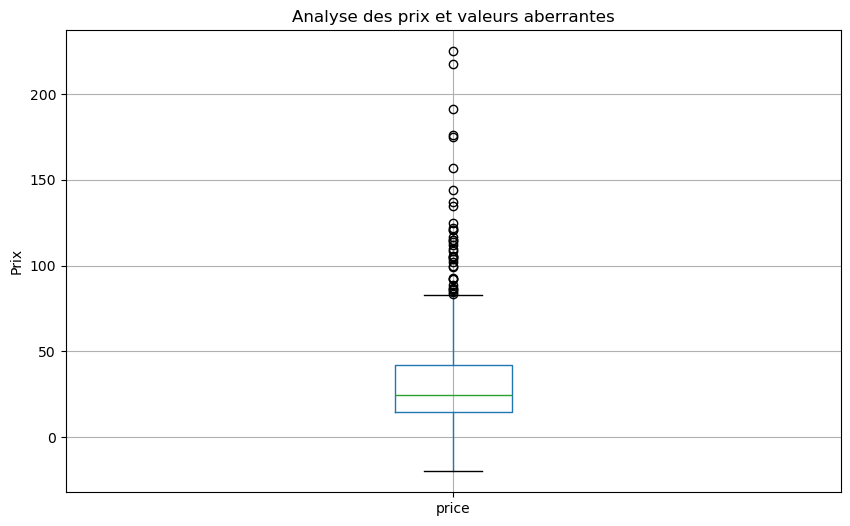

In [843]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_erp.boxplot(column='price', figsize=(10, 6))
plt.title('Analyse des prix et valeurs aberrantes')
plt.ylabel('Prix')
plt.show()

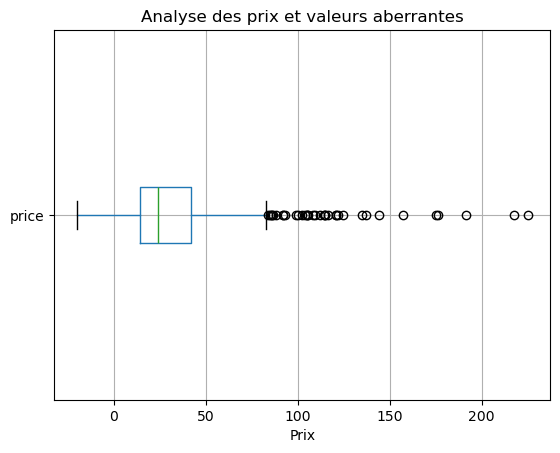

In [845]:
df_erp.boxplot(column='price', vert=False)
plt.title('Analyse des prix et valeurs aberrantes')
plt.xlabel('Prix')
plt.show()

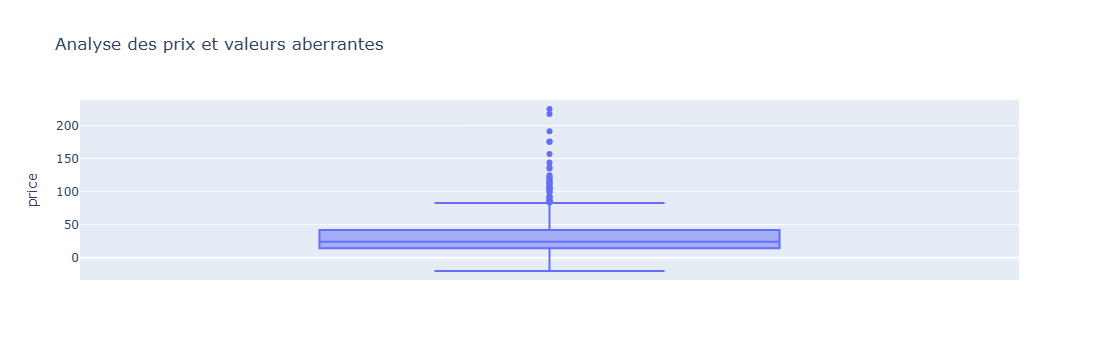

In [847]:
#Autre méthode avec plotly express
fig = px.box(df_erp, y='price', title='Analyse des prix et valeurs aberrantes')
fig.show()

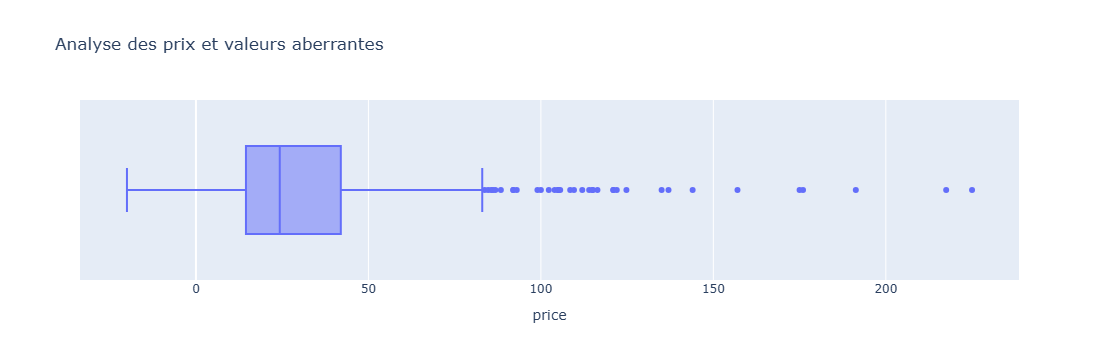

In [849]:
#Autre méthode avec plotly express
fig = px.box(df_erp, x='price', title='Analyse des prix et valeurs aberrantes')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [1074]:
#Calculer la moyenne du prix
moyenne_prix = df_final['price'].mean()
print(f"La moyenne des prix est : {moyenne_prix}")
#Calculer l'écart-type du prix
ecart_type_prix = df_final['price'].std()
print(f"L'écart-type des prix est : {ecart_type_prix}")
#Calculer le Z-score
# Calculer le Z-score pour chaque valeur de la colonne 'price'
df_final['z_score_price'] = (df_final['price'] - moyenne_prix) / ecart_type_prix
# Afficher les Z-scores
print(df_final[['price', 'z_score_price']])

La moyenne des prix est : 32.33368347338936
L'écart-type des prix est : 27.596332419197214
     price  z_score_price
0     53.0       0.748879
1    135.0       3.720288
2     51.6       0.698148
3     59.0       0.966299
4     37.5       0.187210
..     ...            ...
709   61.6       1.060515
710   10.8      -0.780310
711   57.6       0.915568
712   48.5       0.585814
713   40.5       0.295920

[714 rows x 2 columns]


In [1078]:
#Quel est le seuil prix dont z-score est supérieur à 3?
prix_seuil = df_final[df_final['z_score_price'] > 3]
if not prix_seuil.empty:
    print("Seuil(s) de prix dont le Z-score est supérieur à 3 :")
    print(prix_seuil[['price', 'z_score_price']])
else:
    print("Aucun prix n'a un Z-score supérieur à 3.")

Seuil(s) de prix dont le Z-score est supérieur à 3 :
     price  z_score_price
1    135.0       3.720288
12   124.8       3.350674
16   191.3       5.760415
29   217.5       6.709816
30   121.0       3.212975
34   122.0       3.249211
36   176.0       5.205993
178  157.0       4.517496
193  175.0       5.169756
204  137.0       3.792762
210  121.0       3.212975
351  116.4       3.046286
681  225.0       6.981591


In [1084]:
#Définissez un seuil pour les articles "outliers" en prix (from scipy import stats)
df_final['z_score'] = stats.zscore(df_final['price'])

# Identification des outliers (Z-score > 3 ou < -3)
outliers = df_final[(df_final['z_score'] > 3) | (df_final['z_score'] < -3)]

print("Articles outliers (Z-score > 3 ou < -3) :")
print(outliers)

Articles outliers (Z-score > 3 ou < -3) :
     product_id  onsale_web  price  stock_quantity stock_status  \
1          6126           1  135.0             138      instock   
12         5612           1  124.8              19      instock   
16         5892           1  191.3              98      instock   
29         5001           1  217.5              18      instock   
30         6216           1  121.0              14      instock   
34         5917           1  122.0              12      instock   
36         4402           1  176.0              11      instock   
178        4406           1  157.0              12      instock   
193        5767           1  175.0              12      instock   
204        4904           1  137.0               9      instock   
210        6213           1  121.0               9      instock   
351        6202           1  116.4              12      instock   
681        4352           1  225.0               0   outofstock   

     purchase_price

In [1086]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
nombre_outliers = len(outliers)
proportion_outliers = nombre_outliers / len(df_erp) * 100

print(f"Nombre d'articles outliers : {nombre_outliers}")
print(f"Proportion d'articles outliers : {proportion_outliers:.2f}%")

Nombre d'articles outliers : 13
Proportion d'articles outliers : 1.58%


In [861]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#S'agissant de vins, certains grands crus peuvent être vendus plus cher

In [1090]:
#Afficher les libellés de ces articles
result = df_final[df_final['product_id'].isin(outliers['product_id'])]
result = result[['product_id', 'price', 'stock_quantity', 'stock_status', 
                      'purchase_price', 'total_sales', 'post_title']]
result

,product_id,price,stock_quantity,stock_status,purchase_price,total_sales,post_title
1,6126,135.0,138,instock,80.33,5.0,Champagne Gosset Célébris Vintage 2007
12,5612,124.8,19,instock,66.41,1.0,Domaine Weinbach Gewurztraminer Grand Cru Furs...
16,5892,191.3,98,instock,116.06,6.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...
29,5001,217.5,18,instock,116.87,2.0,David Duband Charmes-Chambertin Grand Cru 2014
30,6216,121.0,14,instock,60.02,2.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...
34,5917,122.0,12,instock,54.24,3.0,Wemyss Malts Single Cask Scotch Whisky Choc 'n...
36,4402,176.0,11,instock,78.25,3.0,Cognac Frapin VIP XO
178,4406,157.0,12,instock,69.08,4.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...
193,5767,175.0,12,instock,90.42,4.0,Camille Giroud Clos de Vougeot 2016
204,4904,137.0,9,instock,67.95,3.0,Domaine Des Croix Corton Charlemagne Grand Cru...


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [1092]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
description = df_final['price'].describe()
print(description)

count    714.000000
mean      32.333683
std       27.596332
min        5.200000
25%       14.062500
50%       23.450000
75%       42.075000
max      225.000000
Name: price, dtype: float64


In [1096]:
#Calcul des quartiles et de l'IQR
Q1= df_final['price'].quantile(0.25)
Q3= df_final['price'].quantile(0.75)
IQR= Q3-Q1 
#Calcul des limites
lower_limit = Q1-1.5*IQR
upper_limit = Q3 + 1.5 * IQR
#Détection des valeurs aberrantes
outliers2=df_final[(df_final['price'] < lower_limit) | (df_final['price'] > upper_limit) ]
outliers2

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,average_rating,total_sales,post_date,product_type,post_title,post_modified,post_type,rotation_stock,z_score,z_score_price
1,6126,1,135.0,138,instock,80.33,14923,14923,0.0,5.0,2019-06-28 17:22:27,Champagne,Champagne Gosset Célébris Vintage 2007,2020-08-27 11:45:02,product,27.6,3.722896,3.720288
7,5025,1,112.0,136,instock,68.60,13914,13914,0.0,6.0,2018-07-18 10:39:43,Champagne,Champagne Agrapart &amp; Fils L'Avizoise Extra...,2020-07-09 17:05:02,product,22.7,2.888868,2.886844
12,5612,1,124.8,19,instock,66.41,14915,14915,0.0,1.0,2019-01-15 15:30:49,Vin,Domaine Weinbach Gewurztraminer Grand Cru Furs...,2019-01-23 09:33:57,product,19.0,3.353023,3.350674
13,4582,1,109.6,18,instock,53.80,12857,12857,0.0,1.0,2018-04-12 17:56:13,Vin,Château de Meursault Puligny-Montrachet 1er Cr...,2020-02-06 16:35:02,product,18.0,2.801839,2.799876
16,5892,1,191.3,98,instock,116.06,14983,14983,0.0,6.0,2019-03-28 10:21:36,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,2020-04-01 09:30:09,product,16.3,5.764453,5.760415
17,4359,1,85.6,112,instock,51.93,13853,13853,0.0,7.0,2018-03-02 11:11:48,Champagne,Champagne Larmandier-Bernier Grand Cru Les Che...,2019-12-23 09:30:11,product,16.0,1.931549,1.930195
24,4115,1,100.0,12,instock,52.70,15382,15382,0.0,1.0,2018-02-13 11:08:45,Vin,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,2020-02-08 11:45:02,product,12.0,2.453723,2.452004
25,5026,1,86.8,101,instock,50.13,13913,13913,0.0,9.0,2018-07-18 10:46:30,Champagne,Champagne Agrapart &amp; Fils Minéral Extra Br...,2020-05-11 14:35:02,product,11.2,1.975063,1.973680
29,5001,1,217.5,18,instock,116.87,14581,14581,0.0,2.0,2018-07-17 09:45:39,Vin,David Duband Charmes-Chambertin Grand Cru 2014,2020-05-16 09:00:05,product,9.0,6.714520,6.709816
30,6216,1,121.0,14,instock,60.02,15070,15070,0.0,2.0,2019-07-25 09:31:09,Vin,Domaine des Comtes Lafon Volnay 1er Cru Champa...,2020-07-30 09:30:08,product,7.0,3.215227,3.212975


In [1098]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
nombre_outliers2 = len(outliers2)
proportion_outliers2 = nombre_outliers2 / len(df_erp) * 100

print(f"Nombre d'articles outliers : {nombre_outliers2}")
print(f"Proportion d'articles outliers : {proportion_outliers2:.2f}%")

Nombre d'articles outliers : 31
Proportion d'articles outliers : 3.76%


In [1106]:
#Afficher les libellés de ces articles
result_interquartile = df_final[df_final['product_id'].isin(outliers2['product_id'])]
result_interquartile = result_interquartile[['product_id', 'price', 'stock_quantity', 'stock_status', 
                      'purchase_price', 'total_sales', 'post_title']]
result_interquartile

,product_id,price,stock_quantity,stock_status,purchase_price,total_sales,post_title
1,6126,135.0,138,instock,80.33,5.0,Champagne Gosset Célébris Vintage 2007
7,5025,112.0,136,instock,68.60,6.0,Champagne Agrapart &amp; Fils L'Avizoise Extra...
12,5612,124.8,19,instock,66.41,1.0,Domaine Weinbach Gewurztraminer Grand Cru Furs...
13,4582,109.6,18,instock,53.80,1.0,Château de Meursault Puligny-Montrachet 1er Cr...
16,5892,191.3,98,instock,116.06,6.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...
17,4359,85.6,112,instock,51.93,7.0,Champagne Larmandier-Bernier Grand Cru Les Che...
24,4115,100.0,12,instock,52.70,1.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...
25,5026,86.8,101,instock,50.13,9.0,Champagne Agrapart &amp; Fils Minéral Extra Br...
29,5001,217.5,18,instock,116.87,2.0,David Duband Charmes-Chambertin Grand Cru 2014
30,6216,121.0,14,instock,60.02,2.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [872]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
#Pour calculer le ca par article, je multiplie le prix de vente par la quantité
df_outer['ca_par_article'] = df_outer['price'] * df_outer['total_sales']
df_outer[['product_id','id_web','price','total_sales','post_title','ca_par_article']]

,product_id,id_web,price,total_sales,post_title,ca_par_article
0,4729,38,8.6,10.0,Emile Boeckel Crémant Brut Blanc de Blancs,86.0
1,4634,41,41.0,6.0,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,246.0
2,4141,304,39.0,8.0,Champagne Gosset Grande Réserve,312.0
3,5932,523,59.9,0.0,Cognac Normandin Mercier VFC,0.0
4,5047,531,22.5,8.0,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,180.0
...,...,...,...,...,...,...
820,7196,NaN,31.0,NaN,NaN,NaN
821,7200,NaN,31.0,NaN,NaN,NaN
822,7201,NaN,31.0,NaN,NaN,NaN
823,7203,NaN,45.0,NaN,NaN,NaN


In [874]:
#Calculez la somme de la colonne "ca_par_article"
chiffre_affaire_total = df_outer['ca_par_article'].sum()
#Ce résultat correspond au chiffre d'affaire du site web
df_outer
print(f"Le chiffre d'affaires total du site web est : {chiffre_affaire_total}")

Le chiffre d'affaires total du site web est : 143680.1


In [876]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_outer 
df_outer_sorted = df_outer.sort_values(by='ca_par_article', ascending=False)
df_outer_sorted

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,average_rating,total_sales,post_date,product_type,post_title,post_modified,post_type,_merge,ca_par_article
567,4352,1,225.0,0,outofstock,137.81,15940,15940,0.0,11.0,2018-03-02 10:30:04,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2020-03-07 11:18:45,product,both,2475.0
269,5892,1,191.3,98,instock,116.06,14983,14983,0.0,6.0,2019-03-28 10:21:36,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,2020-04-01 09:30:09,product,both,1147.8
77,4353,1,79.5,127,instock,45.91,12587,12587,0.0,14.0,2018-03-02 10:37:26,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,2020-08-22 11:45:02,product,both,1113.0
349,5826,1,41.2,34,instock,21.71,15325,15325,0.0,20.0,2019-03-27 17:59:49,Vin,Agnès Levet Côte Rôtie Améthyste 2017,2020-05-21 14:00:02,product,both,824.0
157,6212,1,115.0,16,instock,59.42,13996,13996,0.0,7.0,2019-07-25 09:09:17,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2020-06-16 09:30:16,product,both,805.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7196,0,31.0,55,instock,31.20,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN
821,7200,0,31.0,6,instock,15.54,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN
822,7201,0,31.0,18,instock,16.02,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN
823,7203,0,45.0,30,instock,23.48,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN


In [878]:
#Réinitialiser l'index du dataset par un reset_index
df_outer_sorted = df_outer_sorted.reset_index(drop=True)
df_outer_sorted

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,average_rating,total_sales,post_date,product_type,post_title,post_modified,post_type,_merge,ca_par_article
0,4352,1,225.0,0,outofstock,137.81,15940,15940,0.0,11.0,2018-03-02 10:30:04,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2020-03-07 11:18:45,product,both,2475.0
1,5892,1,191.3,98,instock,116.06,14983,14983,0.0,6.0,2019-03-28 10:21:36,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,2020-04-01 09:30:09,product,both,1147.8
2,4353,1,79.5,127,instock,45.91,12587,12587,0.0,14.0,2018-03-02 10:37:26,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,2020-08-22 11:45:02,product,both,1113.0
3,5826,1,41.2,34,instock,21.71,15325,15325,0.0,20.0,2019-03-27 17:59:49,Vin,Agnès Levet Côte Rôtie Améthyste 2017,2020-05-21 14:00:02,product,both,824.0
4,6212,1,115.0,16,instock,59.42,13996,13996,0.0,7.0,2019-07-25 09:09:17,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2020-06-16 09:30:16,product,both,805.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7196,0,31.0,55,instock,31.20,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN
821,7200,0,31.0,6,instock,15.54,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN
822,7201,0,31.0,18,instock,16.02,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN
823,7203,0,45.0,30,instock,23.48,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN


In [880]:
top_20_articles = df_outer_sorted[['product_id', 'id_web', 'price', 'total_sales', 'post_title', 'ca_par_article']].copy()
#Afficher les 20 premiers articles en CA
# Arrondir la colonne 'ca_par_article' à une décimale
top_20_articles['ca_par_article'] = top_20_articles['ca_par_article'].round(1)
# Trier les données dans l'ordre décroissant par 'ca_par_article'
top_20_articles = top_20_articles.sort_values(by='ca_par_article', ascending=False)
top_20_articles[['product_id','id_web','price','total_sales','post_title','ca_par_article']]

,product_id,id_web,price,total_sales,post_title,ca_par_article
0,4352,15940,225.0,11.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2475.0
1,5892,14983,191.3,6.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,1147.8
2,4353,12587,79.5,14.0,Champagne Egly-Ouriet Grand Cru Brut Rosé,1113.0
3,5826,15325,41.2,20.0,Agnès Levet Côte Rôtie Améthyste 2017,824.0
4,6212,13996,115.0,7.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,805.0
...,...,...,...,...,...,...
820,7196,NaN,31.0,NaN,NaN,NaN
821,7200,NaN,31.0,NaN,NaN,NaN
822,7201,NaN,31.0,NaN,NaN,NaN
823,7203,NaN,45.0,NaN,NaN,NaN


In [882]:
top_20_articles['ca_par_article']=top_20_articles['ca_par_article'].round(1)
# Trier les données dans l'ordre décroissant par 'ca_par_article'
top_20_articles = top_20_articles.sort_values(by='ca_par_article', ascending=False)
# Sélectionner les 20 premiers articles
top_20_articles = top_20_articles.head(20)
top_20_articles

,product_id,id_web,price,total_sales,post_title,ca_par_article
0,4352,15940,225.0,11.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2475.0
1,5892,14983,191.3,6.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,1147.8
2,4353,12587,79.5,14.0,Champagne Egly-Ouriet Grand Cru Brut Rosé,1113.0
3,5826,15325,41.2,20.0,Agnès Levet Côte Rôtie Améthyste 2017,824.0
4,6212,13996,115.0,7.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,805.0
5,5026,13913,86.8,9.0,Champagne Agrapart &amp; Fils Minéral Extra Br...,781.2
6,5008,11602,105.0,7.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,735.0
7,5767,15185,175.0,4.0,Camille Giroud Clos de Vougeot 2016,700.0
8,6126,14923,135.0,5.0,Champagne Gosset Célébris Vintage 2007,675.0
9,5025,13914,112.0,6.0,Champagne Agrapart &amp; Fils L'Avizoise Extra...,672.0


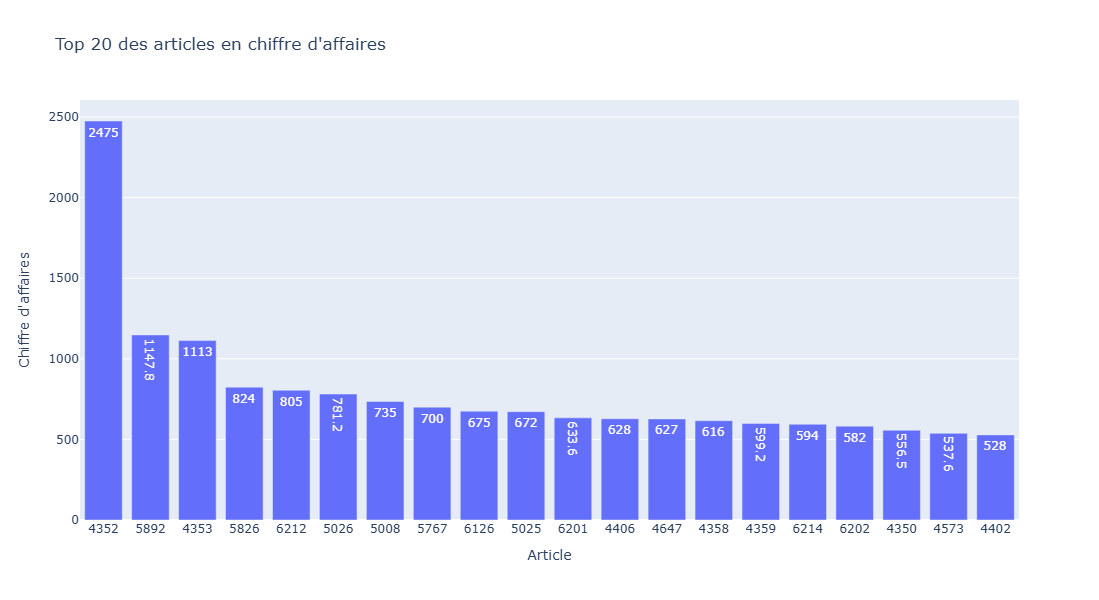

In [884]:
#Graphique en barre des 20 premiers articles avec plotly express
# Trier les données dans l'ordre décroissant par 'ca_par_article'
top_20_articles = top_20_articles.sort_values(by='ca_par_article', ascending=False)

# Convertir product_id en chaîne de caractères (si nécessaire)
top_20_articles['product_id'] = top_20_articles['product_id'].astype(str)

# Tracer le graphique
fig = px.bar(
    top_20_articles, 
    x='product_id', 
    y='ca_par_article', 
    title='Top 20 des articles en chiffre d\'affaires', 
    labels={'product_id': 'Article', 'ca_par_article': 'Chiffre d\'affaires'}, 
    text='ca_par_article',
    width=800,
    height=600,
)

# Mettre l'ordre des catégories dans l'ordre décroissant sur l'axe des abscisses
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Afficher le graphique
fig.show()

In [886]:
px.bar?

Signature:
px.bar(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    pattern_shape_sequence=None,
    pattern_shape_map=None,
    range_color=None,
    color_continuous_midpoint=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    text_auto=False,
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a bar plot,

In [888]:
#Afficher les 20 premiers articles en nombre de ventes
top_20_articles_sales = df_outer[['product_id', 'id_web', 'price', 'total_sales', 'post_title', 'ca_par_article']].copy()
# Trier les données dans l'ordre décroissant par 'total_sales'
top_20_articles_sales = top_20_articles_sales.sort_values(by='total_sales', ascending=False)
# Sélectionner les 20 premiers articles
top_20_articles_sales = top_20_articles_sales.head(20)
top_20_articles_sales[['product_id','id_web','price','total_sales','post_title','ca_par_article']]

,product_id,id_web,price,total_sales,post_title,ca_par_article
636,4867,16148,9.9,36.0,Château De La Selve IGP Coteaux de l'Ardèche M...,356.4
377,4203,15415,9.9,27.0,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,267.3
250,4275,14864,14.9,24.0,I Fabbri Chianti Classico Lamole 2017,357.6
710,4647,16525,28.5,22.0,Bernard Baudry Chinon Rouge La Croix Boissée 2017,627.0
262,4726,14950,12.7,22.0,François Baur Pinot Noir Schlittweg 2017,279.4
349,5826,15325,41.2,20.0,Agnès Levet Côte Rôtie Améthyste 2017,824.0
201,6129,14570,5.2,20.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,104.0
497,4220,15758,11.6,18.0,Xavier Frissant Touraine Amboise Chenin Les Pi...,208.8
468,6569,15705,29.0,17.0,Decelle-Villa Chorey-Lès-Beaune 2016,493.0
126,5803,13572,17.1,17.0,Château Tour Haut-Caussan Médoc 2015,290.7


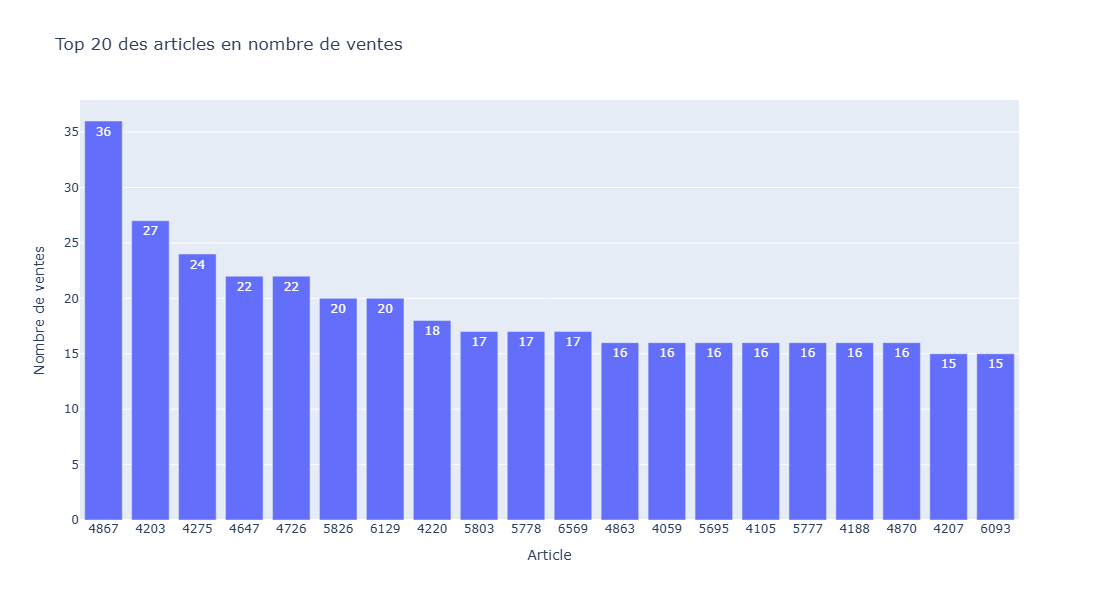

In [890]:
#Graphique en barre des 20 premiers articles en nombre de ventes avec plotly express
# Trier les données dans l'ordre décroissant par 'total_sales'
top_20_articles_sales = top_20_articles_sales.sort_values(by='total_sales', ascending=False)

# Convertir product_id en chaîne de caractères (si nécessaire)
top_20_articles_sales['product_id'] = top_20_articles_sales['product_id'].astype(str)

# Tracer le graphique
fig = px.bar(
    top_20_articles_sales, 
    x='product_id', 
    y='total_sales', 
    title='Top 20 des articles en nombre de ventes', 
    labels={'product_id': 'Article', 'total_sales': 'Nombre de ventes'}, 
    text='total_sales',
    width=800,
    height=600,
)

# Mettre l'ordre des catégories dans l'ordre décroissant sur l'axe des abscisses
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Afficher le graphique
fig.show()

In [1010]:
# Fusionner les deux DataFrames sur la colonne 'product_id'
common_products = pd.merge(
    top_20_articles_sales, 
    top_20_articles, 
    on='product_id', 
    suffixes=('_sales', '_articles')
)

# Afficher les correspondances
print("Correspondances des produits :")
print(common_products[['product_id']])

Correspondances des produits :
  product_id
0       4647
1       5826


In [894]:
#############################
# Calculer le 80 / 20 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_outer_sorted['part_ca'] = (df_outer_sorted['ca_par_article'] / chiffre_affaire_total) * 100
print(df_outer_sorted.head())
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_outer_sorted['part_ca_cumulative'] = df_outer_sorted['part_ca'].cumsum()
print(df_outer_sorted.head())
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
nombre_articles_80_ca = df_outer_sorted[df_outer_sorted['part_ca_cumulative'] <= 80].shape[0]
print(f"Nombre d'articles représentant 80% du CA : {nombre_articles_80_ca}")
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
nombre_total_articles = df_outer_sorted.shape[0]
proportion_articles_80_ca = (nombre_articles_80_ca / nombre_total_articles) * 100
print(f"Proportion des articles représentant 80% du CA dans le catalogue : {proportion_articles_80_ca:.2f}%")

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        4352           1  225.0               0   outofstock          137.81   
1        5892           1  191.3              98      instock          116.06   
2        4353           1   79.5             127      instock           45.91   
3        5826           1   41.2              34      instock           21.71   
4        6212           1  115.0              16      instock           59.42   

  id_web    sku  average_rating  total_sales           post_date product_type  \
0  15940  15940             0.0         11.0 2018-03-02 10:30:04    Champagne   
1  14983  14983             0.0          6.0 2019-03-28 10:21:36    Champagne   
2  12587  12587             0.0         14.0 2018-03-02 10:37:26    Champagne   
3  15325  15325             0.0         20.0 2019-03-27 17:59:49          Vin   
4  13996  13996             0.0          7.0 2019-07-25 09:09:17          Vin   

                          

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [897]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_final
df_outer_sorted = df_outer.sort_values(by='total_sales', ascending=False)
print(df_outer_sorted.head())
#Réinitialiser l'index du dataset par un reset_index
df_outer_sorted_reset = df_outer_sorted.reset_index(drop=True)
print(df_outer_sorted_reset.head())

     product_id  onsale_web  price  stock_quantity stock_status  \
636        4867           1    9.9             121      instock   
377        4203           1    9.9              74      instock   
250        4275           1   14.9              62      instock   
710        4647           1   28.5              45      instock   
262        4726           1   12.7               0   outofstock   

     purchase_price id_web    sku  average_rating  total_sales  \
636            4.86  16148  16148             0.0         36.0   
377            5.01  15415  15415             0.0         27.0   
250            7.78  14864  14864             0.0         24.0   
710           14.14  16525  16525             0.0         22.0   
262            6.82  14950  14950             0.0         22.0   

              post_date product_type  \
636 2018-05-03 13:20:05          Vin   
377 2018-02-15 14:33:42          Vin   
250 2018-02-27 13:33:54          Vin   
710 2018-04-17 09:28:58          Vin   


In [899]:
#Afficher les 20 premiers articles en quantité
top_20_articles_quantite = df_outer_sorted_reset.head(20)
top_20_articles_quantite[['product_id','price','total_sales','post_title','ca_par_article']]

,product_id,price,total_sales,post_title,ca_par_article
0,4867,9.9,36.0,Château De La Selve IGP Coteaux de l'Ardèche M...,356.4
1,4203,9.9,27.0,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,267.3
2,4275,14.9,24.0,I Fabbri Chianti Classico Lamole 2017,357.6
3,4647,28.5,22.0,Bernard Baudry Chinon Rouge La Croix Boissée 2017,627.0
4,4726,12.7,22.0,François Baur Pinot Noir Schlittweg 2017,279.4
5,5826,41.2,20.0,Agnès Levet Côte Rôtie Améthyste 2017,824.0
6,6129,5.2,20.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,104.0
7,4220,11.6,18.0,Xavier Frissant Touraine Amboise Chenin Les Pi...,208.8
8,6569,29.0,17.0,Decelle-Villa Chorey-Lès-Beaune 2016,493.0
9,5803,17.1,17.0,Château Tour Haut-Caussan Médoc 2015,290.7


In [901]:
#Afficher les 5 premiers articles en quantité
top_5_articles_quantite = df_outer_sorted_reset.head(5)
top_5_articles_quantite[['product_id','price','total_sales','post_title','ca_par_article','product_type']]

,product_id,price,total_sales,post_title,ca_par_article,product_type
0,4867,9.9,36.0,Château De La Selve IGP Coteaux de l'Ardèche M...,356.4,Vin
1,4203,9.9,27.0,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,267.3,Vin
2,4275,14.9,24.0,I Fabbri Chianti Classico Lamole 2017,357.6,Vin
3,4647,28.5,22.0,Bernard Baudry Chinon Rouge La Croix Boissée 2017,627.0,Vin
4,4726,12.7,22.0,François Baur Pinot Noir Schlittweg 2017,279.4,Vin


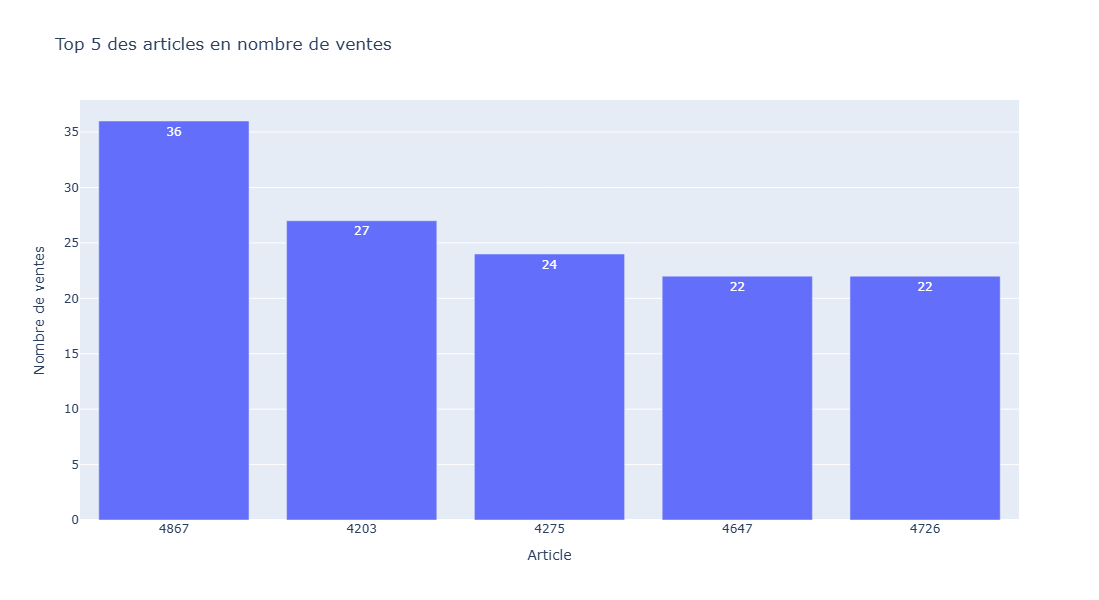

In [903]:
# Trier les données dans l'ordre décroissant par 'total_sales'
top_5_articles_quantite = top_5_articles_quantite.sort_values(by='total_sales', ascending=False)

# Convertir product_id en chaîne de caractères (si nécessaire)
top_5_articles_quantite['product_id'] = top_5_articles_quantite['product_id'].astype(str)

# Tracer le graphique
fig = px.bar(
    top_5_articles_quantite, 
    x='product_id', 
    y='total_sales', 
    title='Top 5 des articles en nombre de ventes', 
    labels={'product_id': 'Article', 'total_sales': 'Nombre de ventes'}, 
    text='total_sales',
    width=800,
    height=600,
)

# Mettre l'ordre des catégories dans l'ordre décroissant sur l'axe des abscisses
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Afficher le graphique
fig.show()

In [905]:
#Afficher les 5 derniers articles en quantité
df_outer_sorted_5 = df_outer.sort_values(by='total_sales', ascending=True)
#Réinitialiser l'index du dataset par un reset_index
df_outer_sorted_reset_5 = df_outer_sorted_5.reset_index(drop=True)
flop_5_articles_quantite = df_outer_sorted_reset_5.head(5)
flop_5_articles_quantite[['product_id','price','total_sales','post_title','ca_par_article','product_type']]

,product_id,price,total_sales,post_title,ca_par_article,product_type
0,4923,7.0,0.0,Cave de Castelmaure Corbières Rouge Vigneron 2018,0.0,Vin
1,6038,48.5,0.0,I Fabbri Chianti Classico Gran Selezione 2015,0.0,Vin
2,4337,83.0,0.0,Champagne Mailly Grand Cru Les Echansons 2007,0.0,Champagne
3,4198,5.8,0.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,0.0,Vin
4,4065,19.5,0.0,Oratoire Saint Martin Cairanne Rouge Les Douye...,0.0,Vin


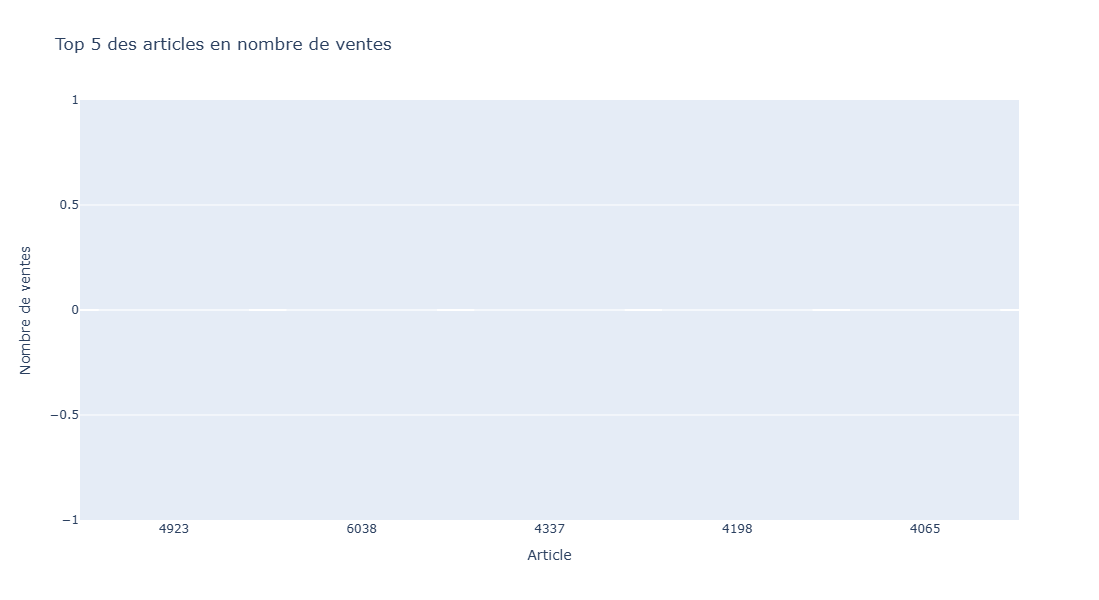

In [907]:
# Trier les données dans l'ordre décroissant par 'total_sales'
flop_5_articles_quantite = flop_5_articles_quantite.sort_values(by='total_sales', ascending=False)

# Convertir product_id en chaîne de caractères (si nécessaire)
flop_5_articles_quantite['product_id'] = flop_5_articles_quantite['product_id'].astype(str)

# Tracer le graphique
fig = px.bar(
    flop_5_articles_quantite, 
    x='product_id', 
    y='total_sales', 
    title='Top 5 des articles en nombre de ventes', 
    labels={'product_id': 'Article', 'total_sales': 'Nombre de ventes'}, 
    text='total_sales',
    width=800,
    height=600,
)

# Mettre l'ordre des catégories dans l'ordre décroissant sur l'axe des abscisses
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Afficher le graphique
fig.show()

In [909]:
#Compter le nombre d'articles qui n'ont aucune vente
# Filtrer les lignes où total_sales est égal à 0
lignes_total_sales_zero = df_outer[df_outer['total_sales'] == 0][['product_id', 'id_web', 'price', 'total_sales', 'post_title', 'ca_par_article','stock_quantity']]

# Compter le nombre de lignes
nombre_total_sales_zero = len(lignes_total_sales_zero)
print(f"Nombre de lignes avec total_sales = 0 : {nombre_total_sales_zero}")

Nombre de lignes avec total_sales = 0 : 25


In [911]:
lignes_total_sales_zero

,product_id,id_web,price,total_sales,post_title,ca_par_article,stock_quantity
3,5932,523,59.90,0.0,Cognac Normandin Mercier VFC,0.0,13
26,4337,4679,83.00,0.0,Champagne Mailly Grand Cru Les Echansons 2007,0.0,145
39,4396,9636,62.00,0.0,Wemyss Malts Blended Malt Scotch Whisky The Hi...,0.0,0
79,4355,12589,12.65,0.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,0.0,97
94,4196,13032,27.20,0.0,Château de La Liquière Faugères Tucade 2015,0.0,0
99,4079,13078,37.00,0.0,Le Vieux Donjon Châteauneuf-du-Pape 2013,0.0,0
114,4100,13416,15.80,0.0,Emile Boeckel Gewurztraminer Grand Cru Zotzenb...,0.0,0
124,5707,13557,10.80,0.0,Domaine des Terres d'Ocre Saint-Pourçain Rouge...,0.0,0
168,5384,14149,28.80,0.0,Liban Vallée de la Békaa Château Marsyas 2012,0.0,0
172,5712,14241,57.60,0.0,Albert Mann Gewurztraminer Vendanges Tardives ...,0.0,0


In [913]:
#############################
# Calculer le 20 / 80 en quantité #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
total_quantites_vendues = df_outer_sorted_reset['total_sales'].sum()
df_outer_sorted_reset['part_quantite'] = (df_outer_sorted_reset['total_sales'] / total_quantites_vendues) * 100
print(df_outer_sorted_reset[['product_id', 'total_sales', 'part_quantite']].head())
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_outer_sorted_reset['part_quantite_cumulative'] = df_outer_sorted_reset['part_quantite'].cumsum()
print(df_outer_sorted_reset[['product_id', 'part_quantite', 'part_quantite_cumulative']].head())
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 20% des ventes en quantité
articles_20_pourcent = df_outer_sorted_reset[df_outer_sorted_reset['part_quantite_cumulative'] <= 20]
nombre_articles_20_pourcent = len(articles_20_pourcent)
print(f"Nombre d'articles représentant 20% des ventes en quantité : {nombre_articles_20_pourcent}")
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_articles_20_pourcent = (nombre_articles_20_pourcent / nombre_total_articles) * 100
print(f"Proportion d'articles représentant 20% des ventes en quantité : {proportion_articles_20_pourcent:.2f}%")

   product_id  total_sales  part_quantite
0        4867         36.0       0.625978
1        4203         27.0       0.469484
2        4275         24.0       0.417319
3        4647         22.0       0.382542
4        4726         22.0       0.382542
   product_id  part_quantite  part_quantite_cumulative
0        4867       0.625978                  0.625978
1        4203       0.469484                  1.095462
2        4275       0.417319                  1.512780
3        4647       0.382542                  1.895323
4        4726       0.382542                  2.277865
Nombre d'articles représentant 20% des ventes en quantité : 75
Proportion d'articles représentant 20% des ventes en quantité : 9.09%


In [915]:
#AJOUTER EN FAISANT AVEC 80
#############################
# Calculer le 80 / 20 en quantité #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
total_quantites_vendues = df_outer_sorted_reset['total_sales'].sum()
df_outer_sorted_reset['part_quantite'] = (df_outer_sorted_reset['total_sales'] / total_quantites_vendues) * 100
print(df_outer_sorted_reset[['product_id', 'total_sales', 'part_quantite']].head())
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_outer_sorted_reset['part_quantite_cumulative'] = df_outer_sorted_reset['part_quantite'].cumsum()
print(df_outer_sorted_reset[['product_id', 'part_quantite', 'part_quantite_cumulative']].head())
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
articles_80_pourcent = df_outer_sorted_reset[df_outer_sorted_reset['part_quantite_cumulative'] <= 80]
nombre_articles_80_pourcent = len(articles_80_pourcent)
print(f"Nombre d'articles représentant 80% des ventes en quantité : {nombre_articles_80_pourcent}")
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_articles_80_pourcent = (nombre_articles_80_pourcent / nombre_total_articles) * 100
print(f"Proportion d'articles représentant 80% des ventes en quantité : {proportion_articles_80_pourcent:.2f}%")

   product_id  total_sales  part_quantite
0        4867         36.0       0.625978
1        4203         27.0       0.469484
2        4275         24.0       0.417319
3        4647         22.0       0.382542
4        4726         22.0       0.382542
   product_id  part_quantite  part_quantite_cumulative
0        4867       0.625978                  0.625978
1        4203       0.469484                  1.095462
2        4275       0.417319                  1.512780
3        4647       0.382542                  1.895323
4        4726       0.382542                  2.277865
Nombre d'articles représentant 80% des ventes en quantité : 433
Proportion d'articles représentant 80% des ventes en quantité : 52.48%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

   product_id  total_sales  stock_quantity  rotation_stock
0        3847          6.0              16             2.7
1        3849          9.0              10             1.1
2        3850          0.0               0             NaN
3        4032         12.0              26             2.2
4        4039          3.0               3             1.0
   product_id  total_sales  stock_quantity  rotation_stock
0        3847          6.0              16             2.7
1        3849          9.0              10             1.1
2        3850          0.0               0             NaN
3        4032         12.0              26             2.2
4        4039          3.0               3             1.0
   product_id  rotation_stock
0        4142            31.2
1        6126            27.6
2        4356            27.0
3        4348            25.0
4        4148            23.7


C:\Users\elodi\AppData\Local\Temp\ipykernel_5868\964092558.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



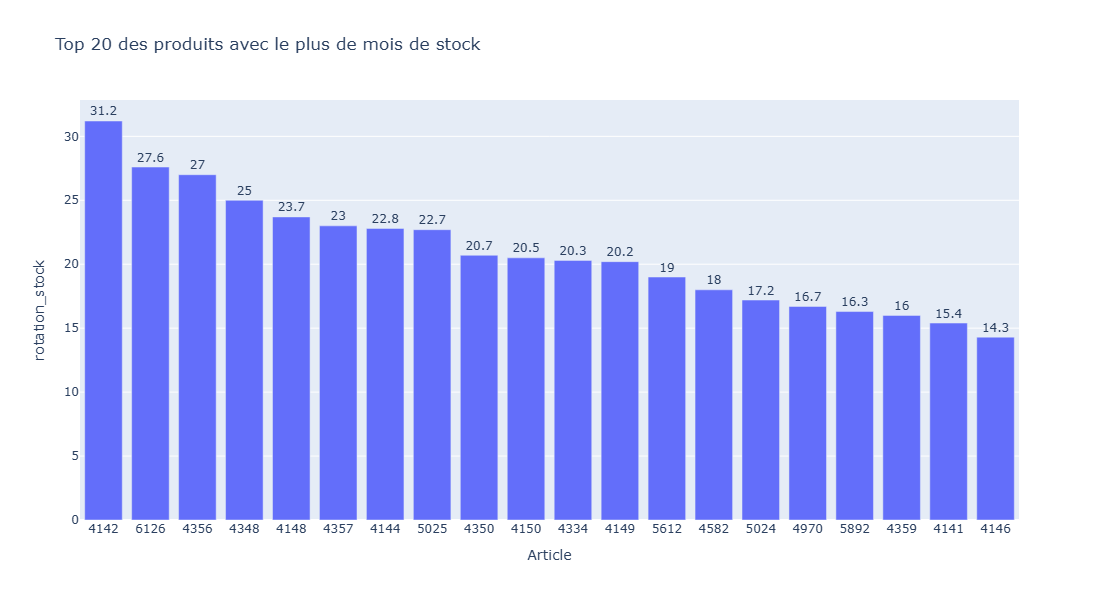

In [918]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np
#Création de la colonne Rotation de stock --> on calcule la rotation de stock en divisant le stock par le total des ventes
df_final['rotation_stock'] = df_final['stock_quantity'] / df_final['total_sales']
df_final['rotation_stock']=df_final['rotation_stock'].round(1)
print(df_final[['product_id', 'total_sales', 'stock_quantity', 'rotation_stock']].head())
#Remplacement des "inf" par 0
df_final = df_final.replace([float('inf'), float('-inf')], 0)
print(df_final[['product_id', 'total_sales', 'stock_quantity', 'rotation_stock']].head())
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge ---> df_outer_sorted_reset LES QUANTITES SONT VENDUES AU FIL DE L EAU
# Trier le DataFrame dans l'ordre décroissant par 'rotation_stock'
df_final = df_final.sort_values(by='rotation_stock', ascending=False).reset_index(drop=True)
# Afficher les premières lignes du DataFrame pour vérifier le résultat
print(df_final[['product_id','rotation_stock']].head())
#Graphique en barres du flop 20 des produits qui ont le plus de mois de stock
# Sélectionner les 20 articles ayant le plus de mois de stock (flop 20)
top_20 = df_final.head(20)
top_20['product_id'] = top_20['product_id'].astype(str)
fig = px.bar(top_20, 
             x='product_id', 
             y='rotation_stock', 
             title='Top 20 des produits avec le plus de mois de stock', 
             labels={'rotation_stock': 'rotation_stock', 'product_id': 'Article'},
             text='rotation_stock',
             width=1000,
            height=600)

# Ajuster l'affichage du texte sur les barres
fig.update_traces(textposition='outside')

# Mettre les barres dans l'ordre décroissant pour une meilleure lisibilité
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Afficher le graphique
fig.show()

In [920]:
df_final['rotation_stock'].describe()

count    692.000000
mean       2.968786
std        3.466826
min       -0.100000
25%        1.800000
50%        2.400000
75%        3.100000
max       31.200000
Name: rotation_stock, dtype: float64

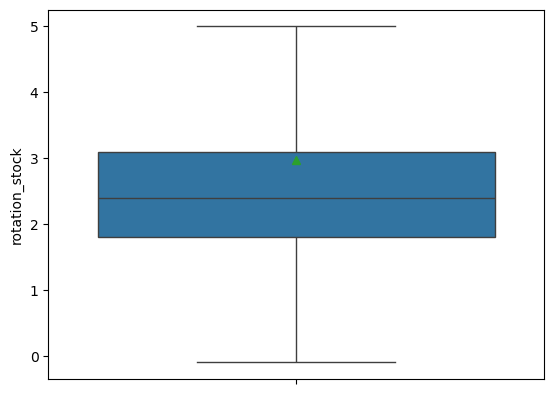

In [922]:
import seaborn as sns
sns.boxplot(data=df_final,y='rotation_stock',showfliers=False, showmeans=True)
plt.show()

In [924]:

# Filtrer les lignes où rotation_stock est négative
negative_rotation = df_final[df_final['rotation_stock'] < 0]

# Afficher les product_id correspondants
negative_product_ids = negative_rotation['product_id']
print("Product IDs avec une rotation de stock négative :")
print(negative_rotation[['product_id', 'rotation_stock', 'stock_quantity', 'total_sales']])

Product IDs avec une rotation de stock négative :
     product_id  rotation_stock  stock_quantity  total_sales
691        5700            -0.1              -1          8.0


In [926]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros: multiplier le stock_quantity et le prix
df_outer_sorted_reset['valorisation_stock'] = df_outer_sorted_reset['stock_quantity'] * df_outer_sorted_reset['price']
print(df_outer_sorted_reset[['product_id', 'stock_quantity', 'price', 'valorisation_stock']].head())
#Calculer la somme de la colonne "Valorisation_stock_euros"
total_valorisation_stock = df_outer_sorted_reset['valorisation_stock'].sum()
print(f"La valorisation totale des stocks est de {total_valorisation_stock:.2f} euros.")

   product_id  stock_quantity  price  valorisation_stock
0        4867             121    9.9              1197.9
1        4203              74    9.9               732.6
2        4275              62   14.9               923.8
3        4647              45   28.5              1282.5
4        4726               0   12.7                 0.0
La valorisation totale des stocks est de 531628.80 euros.


In [928]:
print("Nous avons {:.1f} mois de stock".format(df_outer_sorted_reset["valorisation_stock"].sum() / df_outer_sorted_reset["ca_par_article"].sum()))

Nous avons 3.7 mois de stock


In [930]:
##############################################
# Valorisation du nombre de produits en stock #
##############################################

#Calculer la somme de la colonne stock quantity
total_stock_quantity = df_outer_sorted_reset['stock_quantity'].sum()
print(f"La quantité totale de stock est de {total_stock_quantity} unités.")

La quantité totale de stock est de 17811 unités.


In [1014]:
##############################################
# Types de produits les plus en stock #
##############################################
# Trier les données dans l'ordre décroissant par 'stock_quantity'
top_stock_quantite = df_outer_sorted_reset.copy()
top_stock_quantite = top_stock_quantite.sort_values(by='stock_quantity', ascending=False)
top_stock_quantite

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,average_rating,total_sales,post_date,product_type,post_title,post_modified,post_type,_merge,ca_par_article,part_quantite,part_quantite_cumulative,valorisation_stock,prix_HT,taux_de_marge
422,4350,1,79.5,145,instock,47.30,12588,12588,0.0,7.0,2018-03-02 10:00:02,Champagne,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,2020-08-27 11:45:02,product,both,556.5,0.121718,78.768910,11527.5,66.250000,28.603774
710,4337,1,83.0,145,instock,48.90,4679,4679,0.0,0.0,2018-03-01 14:19:24,Champagne,Champagne Mailly Grand Cru Les Echansons 2007,2020-07-08 17:35:03,product,both,0.0,0.000000,100.000000,12035.0,69.166667,29.301205
393,4334,1,49.0,142,instock,30.01,7818,7818,0.0,7.0,2018-03-01 14:02:44,Champagne,Champagne Gosset Grand Blanc de Blancs,2020-08-12 14:00:03,product,both,343.0,0.121718,75.239089,6958.0,40.833333,26.506122
536,6126,1,135.0,138,instock,80.33,14923,14923,0.0,5.0,2019-06-28 17:22:27,Champagne,Champagne Gosset Célébris Vintage 2007,2020-08-27 11:45:02,product,both,675.0,0.086941,90.888541,18630.0,112.500000,28.595556
512,5025,1,112.0,136,instock,68.60,13914,13914,0.0,6.0,2018-07-18 10:39:43,Champagne,Champagne Agrapart &amp; Fils L'Avizoise Extra...,2020-07-09 17:05:02,product,both,672.0,0.104330,88.767171,15232.0,93.333333,26.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,4922,0,21.5,0,outofstock,10.55,15586,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN,NaN,NaN,0.0,17.916667,41.116279
730,4921,0,13.8,0,outofstock,7.13,15608,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN,NaN,NaN,0.0,11.500000,38.000000
731,5954,0,18.8,0,outofstock,9.32,15609,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only,NaN,NaN,NaN,0.0,15.666667,40.510638
366,5700,1,44.5,-1,outofstock,22.30,14736,14736,0.0,8.0,2019-01-31 11:58:26,Vin,"Gilles Robin Crozes-Hermitage Rouge ""1920"" 2016",2020-04-21 10:45:03,product,both,356.0,0.139106,71.587550,-44.5,37.083333,39.865169


In [1026]:
#Faire le top_25 des articles en quantité de stock
top_stock_quantite.head(25)[['product_id', 'stock_quantity', 'post_title','product_type','price']]

,product_id,stock_quantity,post_title,product_type,price
422,4350,145,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,Champagne,79.50
710,4337,145,Champagne Mailly Grand Cru Les Echansons 2007,Champagne,83.00
393,4334,142,Champagne Gosset Grand Blanc de Blancs,Champagne,49.00
536,6126,138,Champagne Gosset Célébris Vintage 2007,Champagne,135.00
512,5025,136,Champagne Agrapart &amp; Fils L'Avizoise Extra...,Champagne,112.00
35,4353,127,Champagne Egly-Ouriet Grand Cru Brut Rosé,Champagne,79.50
252,5761,125,Huiles d'Olive Extra Vierge Planeta 3x 10cl,Huile d'olive,19.50
586,4142,125,Champagne Gosset Grand Millésime 2006,Champagne,53.00
529,4348,125,Champagne Egly-Ouriet Grand Cru Brut Tradition,Champagne,59.00
514,4150,123,Champagne Mailly Grand Cru Intemporelle 2010,Champagne,59.00


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [933]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
taux_tva = 0.20
df_outer_sorted_reset['prix_HT'] = df_outer_sorted_reset['price'] / (1 + taux_tva)
print(df_outer_sorted_reset[['product_id', 'price', 'prix_HT']].head())
#Création de la colonne Taux de marge
df_outer_sorted_reset['taux_de_marge'] = (df_outer_sorted_reset['prix_HT'] - df_outer_sorted_reset['purchase_price']) / df_outer_sorted_reset['prix_HT'] * 100
print(df_outer_sorted_reset[['product_id', 'prix_HT', 'purchase_price', 'taux_de_marge']].head())
#Afficher le prix minimum de la colonne "taux_marge"
min_taux_marge = df_outer_sorted_reset['taux_de_marge'].min()
print(f"Le taux de marge minimum est de {min_taux_marge:.2f}%.")
ligne_min_taux_marge = df_outer_sorted_reset.loc[df_outer_sorted_reset['taux_de_marge'].idxmin()]
prix_correspondant_HT_min = ligne_min_taux_marge['prix_HT']
prix_correspondant_min = ligne_min_taux_marge['price']
print(f"Le prix HT correspondant au taux de marge minimum HT est de {prix_correspondant_HT_min:.2f} euros.")
print(f"Le prix correspondant au taux de marge minimum est de {prix_correspondant_min:.2f} euros.")

#Afficher le prix maximum de la colonne "taux_marge"
max_taux_marge = df_outer_sorted_reset['taux_de_marge'].max()
print(f"Le taux de marge maximum est de {max_taux_marge:.2f}%.")
ligne_max_taux_marge = df_outer_sorted_reset.loc[df_outer_sorted_reset['taux_de_marge'].idxmax()]
prix_correspondant_HT_max = ligne_max_taux_marge['prix_HT']
prix_correspondant_max = ligne_max_taux_marge['price']
print(f"Le prix HT correspondant au taux de marge maximum HT est de {prix_correspondant_HT_max:.2f} euros.")
print(f"Le prix correspondant au taux de marge maximum est de {prix_correspondant_max:.2f} euros.")

   product_id  price    prix_HT
0        4867    9.9   8.250000
1        4203    9.9   8.250000
2        4275   14.9  12.416667
3        4647   28.5  23.750000
4        4726   12.7  10.583333
   product_id    prix_HT  purchase_price  taux_de_marge
0        4867   8.250000            4.86      41.090909
1        4203   8.250000            5.01      39.272727
2        4275  12.416667            7.78      37.342282
3        4647  23.750000           14.14      40.463158
4        4726  10.583333            6.82      35.559055
Le taux de marge minimum est de -634.99%.
Le prix HT correspondant au taux de marge minimum HT est de 10.54 euros.
Le prix correspondant au taux de marge minimum est de 12.65 euros.
Le taux de marge maximum est de 165.10%.
Le prix HT correspondant au taux de marge maximum HT est de -6.67 euros.
Le prix correspondant au taux de marge maximum est de -8.00 euros.


In [935]:
#affichage de la ligne avec un taux de marge inférieur à 0 ---> il y en a plusieurs
lignes_marge_negative = df_outer_sorted_reset[df_outer_sorted_reset['taux_de_marge'] <-600]
print(lignes_marge_negative)

     product_id  onsale_web  price  stock_quantity stock_status  \
697        4355           1  12.65              97      instock   

     purchase_price id_web    sku  average_rating  total_sales  \
697           77.48  12589  12589             0.0          0.0   

              post_date product_type  \
697 2018-03-02 10:46:10    Champagne   

                                         post_title       post_modified  \
697  Champagne Egly-Ouriet Grand Cru Blanc de Noirs 2020-08-13 10:15:02   

    post_type _merge  ca_par_article  part_quantite  part_quantite_cumulative  \
697   product   both             0.0            0.0                     100.0   

     valorisation_stock    prix_HT  taux_de_marge  
697             1227.05  10.541667    -634.988142  


In [937]:
#création d'un dataframe avec les taux positifs
df_marge_positive = df_outer_sorted_reset[df_outer_sorted_reset['taux_de_marge'] >= 0]
print(df_marge_positive.head())
#Afficher le prix minimum de la colonne "taux_marge"
ligne_min_taux_marge = df_marge_positive.loc[df_marge_positive['taux_de_marge'].idxmin()]
min_taux_marge = ligne_min_taux_marge['taux_de_marge']
prix_ht_correspondant = ligne_min_taux_marge['prix_HT']
prix_ttc_correspondant = ligne_min_taux_marge['price']
print(f"Le taux de marge minimum dans les marges positives est de {min_taux_marge:.2f}%, avec un prix HT de {prix_ht_correspondant:.2f} euros et un prix TTC de {prix_ttc_correspondant:.2f} euros.")
#Afficher le prix maximum de la colonne "taux_marge"
ligne_max_taux_marge = df_marge_positive.loc[df_marge_positive['taux_de_marge'].idxmax()]
max_taux_marge = ligne_max_taux_marge['taux_de_marge']
prix_ht_correspondant = ligne_max_taux_marge['prix_HT']
prix_ttc_correspondant = ligne_max_taux_marge['price']
print(f"Le taux de marge maximum dans les marges positives est de {max_taux_marge:.2f}%, avec un prix HT de {prix_ht_correspondant:.2f} euros et un prix TTC de {prix_ttc_correspondant:.2f} euros.")

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        4867           1    9.9             121      instock            4.86   
1        4203           1    9.9              74      instock            5.01   
2        4275           1   14.9              62      instock            7.78   
3        4647           1   28.5              45      instock           14.14   
4        4726           1   12.7               0   outofstock            6.82   

  id_web    sku  average_rating  total_sales           post_date product_type  \
0  16148  16148             0.0         36.0 2018-05-03 13:20:05          Vin   
1  15415  15415             0.0         27.0 2018-02-15 14:33:42          Vin   
2  14864  14864             0.0         24.0 2018-02-27 13:33:54          Vin   
3  16525  16525             0.0         22.0 2018-04-17 09:28:58          Vin   
4  14950  14950             0.0         22.0 2018-04-18 11:53:51          Vin   

                          

In [705]:
df_marge_positive['taux_de_marge'].describe()

count    821.000000
mean      38.314832
std        8.130242
min       22.778626
25%       36.135593
50%       37.991525
75%       39.865385
max      165.100000
Name: taux_de_marge, dtype: float64

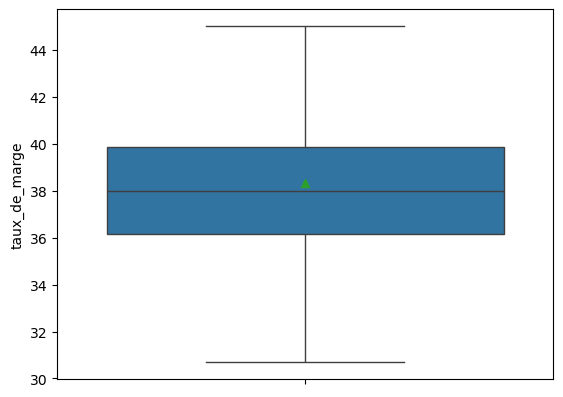

In [707]:
#plt.figure(figsize=(8,5))
sns.boxplot(data=df_marge_positive,y='taux_de_marge',showfliers=False, showmeans=True)
plt.show()

    product_type  taux_marge_moyen
3  Huile d'olive         24.998198
0      Champagne         28.488539
4            Vin         38.012262
2            Gin         42.800000
5         Whisky         44.918865
1         Cognac         45.067614


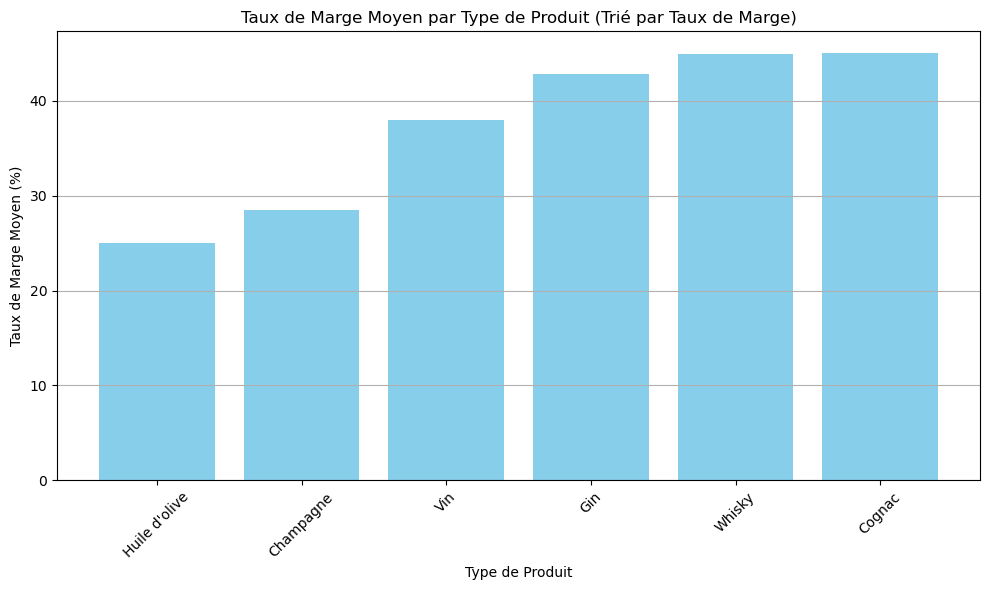

In [709]:
#création d'un dataframe avec le taux de marge moyen par type de produit
taux_marge_moyen_par_type = df_marge_positive.groupby('product_type')['taux_de_marge'].mean().reset_index()
taux_marge_moyen_par_type.columns = ['product_type', 'taux_marge_moyen']
taux_marge_moyen_par_type = taux_marge_moyen_par_type.sort_values(by='taux_marge_moyen', ascending=True)
print(taux_marge_moyen_par_type)
#Affichage dans un graphique du taux de marge par type de produit
import matplotlib.pyplot as plt

# Supposons que vous avez déjà le DataFrame taux_marge_moyen_par_type
# Création du graphique
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(taux_marge_moyen_par_type['product_type'], taux_marge_moyen_par_type['taux_marge_moyen'], color='skyblue')
plt.xlabel('Type de Produit')
plt.ylabel('Taux de Marge Moyen (%)')
plt.title('Taux de Marge Moyen par Type de Produit (Trié par Taux de Marge)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Ajuster le layout pour que tout s'affiche correctement
plt.show()

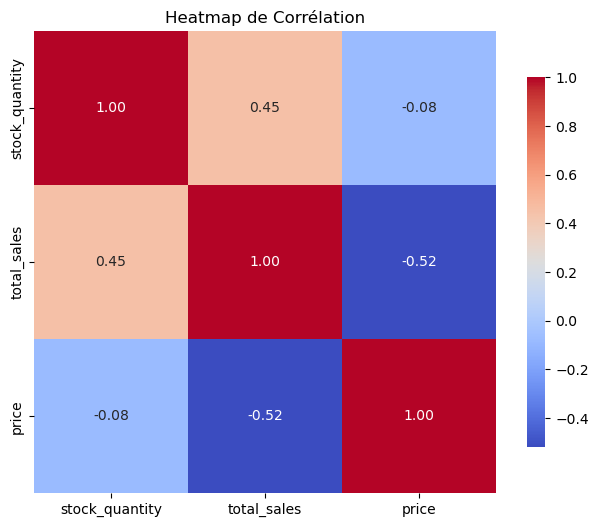

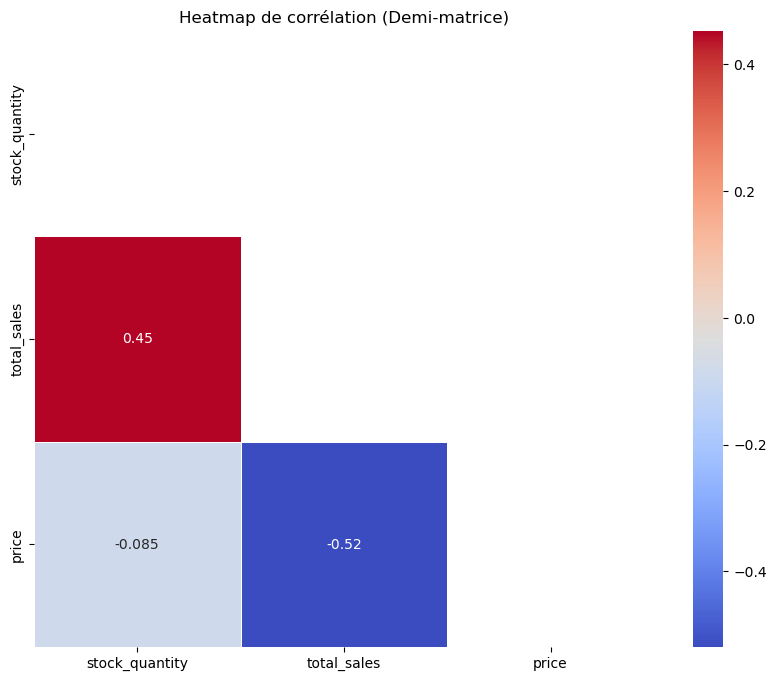

In [711]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
#Création d'un heatmap de correlation avec les variables stock, sales et price
correlation_matrix = df_marge_positive[['stock_quantity', 'total_sales', 'price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap de Corrélation')
plt.show()
#on peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de corrélation (Demi-matrice)')
plt.show()

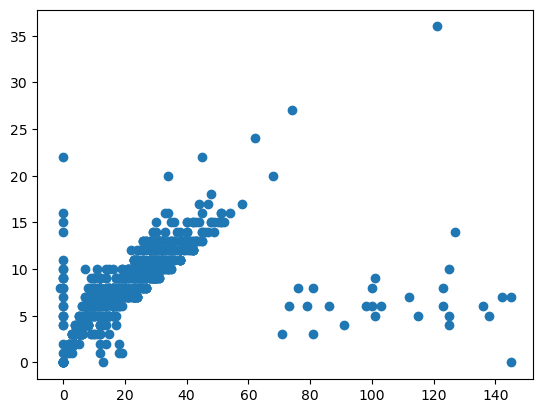

In [713]:
plt.scatter(df_marge_positive['stock_quantity'],df_marge_positive['total_sales'])
plt.show()

In [715]:
#Que peut-on conclure des correlations ?
# Plus on a de quantités en stock, plus on a de ventes
# Plus un prix est élevé, moins on a de ventes

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [718]:
#Mettre le dataset df_merge sur un fichier Excel --> plutôt df_marge_positive ??
df_marge_positive.to_excel('df_marge_positive.xlsx', index=False)
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
